In [6]:
import psycopg2
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy

file_path = './data/meta.pickle'

In [46]:
# Replace these values with your actual connection details
host = '***'  # Or the IP address of the Docker container
dbname = '****'
user = '*****'   # Or your PostgreSQL username
password = '******'
port = 0000

# Establish the database connection
conn = psycopg2.connect(host=host, dbname=dbname, user=user, password=password, port=port)

# Perform database operations using the db connection
# ...

# log = pd.read_sql("select * from logtable", conn)
info = pd.read_sql("select * from info", conn)
meta = pd.read_sql("select * from meta", conn)

# meta = meta.loc[(meta['zcode'] == '41') | (meta['zcode'] == '11') | (meta['zcode'] == '28')].reset_index(drop=True)
meta = meta.loc[meta['output'].notna()]

# info = info.loc[info['limityn'] == 'N']
# info = info.loc[info['usetime'].notna()]

# usetimeList = info['usetime'].unique()
# value_counts = info['usetime'].value_counts()
# info = info[info['usetime'].isin(value_counts[value_counts > 4].index)]

# condition = ['24시간 이용가능,입주민만 사용가능 거주자외출입제한', '비개방', '~', '24시간 이용가능,입주민만 사용가능 거주자 외 출입제한', '24시간 이용가능/외부인 출입제한','외부인 사용불가', '해당 시설 규정에 따름','24시간 이용가능(입주민 외 이용제한 있을 수 있음)',
#               '24시간 이용가능(투숙객 외 이용불가)','24시간 이용가능/입주민만이용가능','24시간 이용가능 (업무자 외 출입제한)','24시간 이용가능 / 입주민만 사용가능','24시간 이용가능, 아파트 입주민만 사용가능','24시간 이용가능 (외부인 이용불가)',
#               '24시간 이용가능,입주민만 사용가능 거주자 외 출입제','24시간 이용가능, 외부인 사용불가','입주민 전용 24시간','관계자전용 09:00~18:00','비개방(직원전용)','비개방(교직원전용)','비개방(임직원전용)']

# info = info.loc[~info['usetime'].isin(condition)]
# feature_col = ['statnm','statid','chgerid','chgertype','addr','lat','lng','busiid','output','zscode']
# meta = meta[feature_col]
# meta = pd.merge(meta, info, on = ['statid', 'chgerid'])
# meta = meta.loc[meta['delyn'] == 'N']
# meta = meta[meta.columns[:11]]
# meta = meta.reset_index(drop=True)

conn.close()

# with open(file_path, 'wb') as f:
#     pickle.dump(meta, f)


In [47]:
meta

,statnm,statid,chgerid,chgertype,addr,location,lat,lng,busiid,bnm,...,powertype,output,method,zcode,zscode,kind,kinddetail,parkingfree,note,trafficyn
0,암사1동 공영주차장,ME174003,01,06,서울특별시 강동구 고덕로28길 36,null,37.5529087,127.1372547,ME,환경부,...,None,50,단독,11,11740,B0,B001,N,None,N
1,천호유수지 공영주차장,ME174004,01,06,서울특별시 강동구 선사로 70,null,37.5448122,127.1218396,ME,환경부,...,None,50,단독,11,11740,B0,B001,N,None,N
2,천호3동 제1공영주차장,ME174005,01,06,서울특별시 강동구 진황도로29길 34,null,37.5387951,127.1333987,ME,환경부,...,None,50,단독,11,11740,B0,B001,N,None,N
3,가로공원로 지하공영주차장,ME174006,01,06,서울특별시 강서구 가로공원로 189,null,37.5372628,126.8383789,ME,환경부,...,None,50,단독,11,11500,B0,B001,N,None,N
4,곰달래문화복지센터 공영주차장,ME174007,01,06,서울특별시 강서구 강서로5길 50,null,37.5289561,126.8490887,ME,환경부,...,None,50,단독,11,11500,B0,B001,N,None,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272958,서울중랑 중랑숲금호어울림 5,EV012571,03,02,서울특별시 중랑구 양원역로 18,109동 뒤 1층 지상스탠드폴형,37.60277431,127.108648,EV,에버온,...,None,7,단독,11,11260,H0,H001,N,None,N
272959,서울중랑 중랑숲금호어울림 6,EV012572,01,02,서울특별시 중랑구 양원역로 18,113동 뒤 1층 지상스탠드폴형,37.60277431,127.108648,EV,에버온,...,None,7,단독,11,11260,H0,H001,N,None,N
272960,서울중랑 중랑숲금호어울림 6,EV012572,02,02,서울특별시 중랑구 양원역로 18,113동 뒤 1층 지상스탠드폴형,37.60277431,127.108648,EV,에버온,...,None,7,단독,11,11260,H0,H001,N,None,N
272961,경남창원 창포경민아파트,EV012573,01,02,경상남도 창원시 마산합포구 문화동14길 46,관리사무실 앞,35.18213059,128.5613823,EV,에버온,...,None,7,단독,48,48120,H0,H001,N,None,N


In [2]:
def preprocessing(data):
    with open(data, 'rb') as f:
        meta = pickle.load(f)

    meta['lat'] = meta['lat'].astype(float)
    meta['lng'] = meta['lng'].astype(float)

    #위도, 경도 필터링
    y_coor_max = 38.1873254
    y_coor_min = 36.8989773
    x_coor_max = 127.8437794
    x_coor_min = 126.3695445

    meta = meta.loc[(meta['lat'] > y_coor_min) & (meta['lat'] < y_coor_max) & (meta['lng'] > x_coor_min) & (meta['lng'] < x_coor_max)]

    #완속, 급속 라벨링
    meta['output'] = meta['output'].astype('int')
    meta['speed'] = meta['output'].apply(lambda x: 0 if x < 50 else 1)
    meta = meta.reset_index(drop=True)

    temp_meta = copy.deepcopy(meta)
    #고유 충전기 정보
    c_meta = temp_meta[['statnm','statid','chgerid','chgertype','speed','zscode']]

    #충전소별 충전기 개수 추가 (Count)
    meta['Count'] = meta.groupby(['statid','speed'])['speed'].transform('count')
    meta = meta.drop_duplicates(['statid','speed'], keep = 'first').reset_index(drop=True)
    return meta, c_meta

In [42]:
meta, c_meta = preprocessing(file_path)

In [40]:
#위치기반 클러스터링 작업
from scipy.spatial.distance import pdist, cdist
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import fcluster

import random
random.seed(34)
np.random.seed(34)

def HAC(df):
    # Calculate the distance matrix using Euclidean distance or other suitable distance metric
    dist_matrix = pdist(df[['lat', 'lng']], metric='euclidean')

    # Perform hierarchical agglomerative clustering
    linkage_matrix = linkage(dist_matrix, method='ward')

    # Plot a dendrogram to visualize the hierarchy of clusters
    plt.figure(figsize=(12, 6))
    dendrogram(linkage_matrix)
    plt.title('Hierarchical Agglomerative Clustering Dendrogram')
    plt.xlabel('Charging Stations')
    plt.ylabel('Distance')
    plt.show()
    return linkage_matrix

def HAC_cluster(df, linkage_matrix, cutoff):

    # Choose a height cutoff to determine the number of clusters
    height_cutoff = cutoff  # Adjust this value based on your dendrogram

    # Assign data points to clusters based on the cutoff
    cluster_assignments = fcluster(linkage_matrix, height_cutoff, criterion='distance')

    df['Cluster'] = cluster_assignments 
    return df

def clustering(meta):
    whole = HAC(meta)
    result = HAC_cluster(meta, whole, 0.15)
    return result

In [51]:
meta.loc[meta['Cluster'] == 1]

,statnm,statid,chgerid,chgertype,addr,lat,lng,busiid,output,zscode,usetime,speed,Count,Cluster
391,왕산 공영주차장,391,21,4,인천광역시 중구 을왕동 808-5,37.456326,126.371547,45,200,28110,24시간 이용가능,1,1,1
949,동양염전베이커리카페,927,01,2,인천광역시 중구 용유서로 32,37.445018,126.403806,7,7,28110,24시간 이용가능,0,1,1
955,하늘구름,933,01,2,인천광역시 중구 용유서로302번길 36-1,37.447300,126.377900,7,7,28110,24시간 이용가능,0,1,1
1359,인천 교직원수련원(영종도),1300,01,6,인천광역시 중구 용유서로 358,37.450208,126.374141,9,50,28110,09:00~18:00,1,1,1
3345,을왕리 추리븐 급속충전소,3253,01,4,인천광역시 중구 용유서로479번길 42,37.463973,126.369599,16,100,28110,24시간 이용가능,1,1,1
3362,경동 BSC(NEWK),3270,01,2,인천광역시 중구 늘목로7번길 35,37.452167,126.391333,16,7,28110,24시간 이용가능,0,1,1
11293,더위크앤리조트,10893,00,2,인천광역시 중구 용유서로 379,37.451129,126.371161,53,7,28110,24시간 이용가능,0,1,1
12541,을왕주유소,12133,01,4,인천광역시 중구 용유서로 460,37.459100,126.372000,62,200,28110,06:00~23:59,1,1,1
12754,을왕낚시,12335,01,2,인천광역시 중구 용유서로304번길 3,37.445735,126.375748,65,7,28110,24시간 이용가능,0,1,1


In [117]:
meta

,statnm,statid,chgerid,chgertype,addr,lat,lng,busiid,output,zscode,usetime,speed,Count,Cluster
0,암사1동 공영주차장,0,01,6,서울특별시 강동구 고덕로28길 36,37.552909,127.137255,45,50,11740,24시간 이용가능,1,1,162
1,천호유수지 공영주차장,1,01,6,서울특별시 강동구 선사로 70,37.544812,127.121840,45,50,11740,24시간 이용가능,1,1,162
2,천호3동 제1공영주차장,2,01,6,서울특별시 강동구 진황도로29길 34,37.538795,127.133399,45,50,11740,24시간 이용가능,1,1,162
3,가로공원로 지하공영주차장,3,01,6,서울특별시 강서구 가로공원로 189,37.537263,126.838379,45,50,11500,24시간 이용가능,1,1,94
4,곰달래문화복지센터 공영주차장,4,01,6,서울특별시 강서구 강서로5길 50,37.528956,126.849089,45,50,11500,24시간 이용가능,1,1,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14729,인천 하우스토리 만수,14139,02,2,인천광역시 남동구 구월로372번길 90,37.450441,126.731038,30,7,28200,24시간 이용가능,0,1,38
14730,양천 신정이펜하우스 4단지,14140,02,2,서울특별시 양천구 신정이펜1로 51,37.510851,126.831104,30,7,11470,24시간 이용가능,0,1,95
14731,김포 이지더원아파트,14142,01,2,경기도 김포시 김포한강2로 178,37.644066,126.665806,30,7,41570,24시간 이용가능,0,1,31
14732,광진 장로회신학대학,14143,01,2,서울특별시 광진구 광장로5길 25-1,37.549864,127.103315,30,7,11215,24시간 이용가능,0,1,163


In [118]:
latlng = meta.groupby('Cluster').mean()[['lat', 'lng']]; latlng

,lat,lng
Cluster,,
1,37.452329,126.378582
2,37.446063,126.452391
3,37.489838,126.497099
4,37.491252,126.551900
5,37.466420,126.628548
...,...,...
327,37.274756,127.110337
328,37.265551,127.085597
329,37.279162,127.152773


In [39]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class TransformerModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size, dropout_rate=0.5):
        super(TransformerModel, self).__init__()

        self.embedding = nn.Embedding(input_size, hidden_size)
        self.positional_encoding = PositionalEncoding(hidden_size)
        self.transformer_layer = nn.Transformer(d_model=hidden_size, nhead=num_layers,
                                                num_encoder_layers=num_layers, num_decoder_layers=num_layers,
                                                dim_feedforward=hidden_size, dropout=dropout_rate)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.embedding(x)
        x = self.positional_encoding(x)

        # Assuming x is both the source and target sequence for simplicity
        out = self.transformer_layer(x, x)
        output = self.fc(out[-1, :, :])  # Assuming you want the output from the last position

        hidden = self.fc(out[-1, :, :])  # Assuming you want the hidden state from the last position
        output = F.softmax(output, dim=1)

        return output, hidden, out[-1, :, :]

class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=512):
        super(PositionalEncoding, self).__init__()
        self.encoding = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len).unsqueeze(1).float()
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * -(math.log(10000.0) / d_model))
        self.encoding[:, 0::2] = torch.sin(position * div_term)
        self.encoding[:, 1::2] = torch.cos(position * div_term)
        self.encoding = self.encoding.unsqueeze(0)

    def forward(self, x):
        print(x + self.encoding[:, :x.size(1)].detach())
        print((x + self.encoding[:, :x.size(1)].detach()).shape)
        return x + self.encoding[:, :x.size(1)].detach()

# Example usage
input_size = 32  # Vocabulary size
hidden_size = 128
num_layers = 4
output_size = 7

transformer_model = TransformerModel(input_size, hidden_size, num_layers, output_size)

# Create dummy input tensor
batch_size = 1
input_sequence = torch.arange(0, 32).unsqueeze(1)

# Forward pass during training
output_probs, _, _ = transformer_model(input_sequence)


tensor([[[-0.2819, -0.5039,  0.4957,  ...,  0.3772, -0.1741, -0.2882]],

        [[ 0.3111, -0.7971,  1.3812,  ...,  0.6885,  0.7906,  1.6880]],

        [[ 0.5353,  2.4571, -0.1987,  ...,  1.8052, -1.2086,  1.1824]],

        ...,

        [[-0.1395,  2.0272, -1.5917,  ...,  2.4405,  0.7640,  0.9431]],

        [[ 2.2101,  0.2953, -0.2005,  ...,  0.6980, -0.0827,  0.9576]],

        [[ 1.9822,  2.4159, -0.6097,  ...,  0.8971, -0.6081,  0.7353]]],
       grad_fn=<AddBackward0>)
torch.Size([32, 1, 128])


In [42]:
import torch
import torch.nn as nn
import math

class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=32):
        super(PositionalEncoding, self).__init__()
        self.encoding = self.generate_encoding(d_model, max_len)

    def generate_encoding(self, d_model, max_len):
        position = torch.arange(0, max_len).unsqueeze(1).float()
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * -(math.log(10000.0) / d_model))
        encoding = torch.zeros(max_len, d_model)
        encoding[:, 0::2] = torch.sin(position * div_term)
        encoding[:, 1::2] = torch.cos(position * div_term)
        encoding = encoding.unsqueeze(0)
        return encoding

    def forward(self, x):
        return x + self.encoding[:, :x.size(1)].detach()


In [168]:
newlatlng = pd.concat([pd.DataFrame({'lat': 37.419597, 'lng': 126.679707}, index=[0]), latlng], ignore_index=True); newlatlng

,lat,lng
0,37.419597,126.679707
1,37.452329,126.378582
2,37.446063,126.452391
3,37.489838,126.497099
4,37.491252,126.551900
...,...,...
327,37.274756,127.110337
328,37.265551,127.085597
329,37.279162,127.152773
330,37.323129,127.122054


In [169]:
dist_matrix = pdist(newlatlng[['lat','lng']], metric='euclidean'); dist_matrix

array([0.30289899, 0.22885113, 0.19565109, ..., 0.05363469, 0.04094309,
       0.02458459])

In [170]:
dist_matrix[:331].argmin()

49

In [143]:
dist_matrix.argmin()

23147

In [52]:
# Example new latitude and longitude
new_lat = 37.299070
new_lng = 127.116995

# Assign the new lat and lng to an existing cluster
# First, calculate the distances to existing cluster centers
distances = cdist([[new_lat, new_lng]], meta.groupby('Cluster').mean()[['lat', 'lng']], metric='euclidean')

# Find the index of the closest cluster center
closest_cluster = distances.argmin()

# Get the cluster index
assigned_cluster = meta['Cluster'].unique()[closest_cluster]

print(f"The new coordinates ({new_lat}, {new_lng}) are assigned to Cluster {assigned_cluster}.")


The new coordinates (37.29907, 127.116995) are assigned to Cluster 139.


In [24]:
meta

,statnm,statid,chgerid,chgertype,addr,lat,lng,busiid,output,zscode,usetime,speed,Count,Cluster
0,암사1동 공영주차장,0,01,6,서울특별시 강동구 고덕로28길 36,37.552909,127.137255,45,50,11740,24시간 이용가능,1,1,162
1,천호유수지 공영주차장,1,01,6,서울특별시 강동구 선사로 70,37.544812,127.121840,45,50,11740,24시간 이용가능,1,1,162
2,천호3동 제1공영주차장,2,01,6,서울특별시 강동구 진황도로29길 34,37.538795,127.133399,45,50,11740,24시간 이용가능,1,1,162
3,가로공원로 지하공영주차장,3,01,6,서울특별시 강서구 가로공원로 189,37.537263,126.838379,45,50,11500,24시간 이용가능,1,1,94
4,곰달래문화복지센터 공영주차장,4,01,6,서울특별시 강서구 강서로5길 50,37.528956,126.849089,45,50,11500,24시간 이용가능,1,1,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14729,인천 하우스토리 만수,14139,02,2,인천광역시 남동구 구월로372번길 90,37.450441,126.731038,30,7,28200,24시간 이용가능,0,1,38
14730,양천 신정이펜하우스 4단지,14140,02,2,서울특별시 양천구 신정이펜1로 51,37.510851,126.831104,30,7,11470,24시간 이용가능,0,1,95
14731,김포 이지더원아파트,14142,01,2,경기도 김포시 김포한강2로 178,37.644066,126.665806,30,7,41570,24시간 이용가능,0,1,31
14732,광진 장로회신학대학,14143,01,2,서울특별시 광진구 광장로5길 25-1,37.549864,127.103315,30,7,11215,24시간 이용가능,0,1,163


In [32]:
data = {'lat': [1, 2, 3, 4, 5], 'lng': [4, 5, 6, 4, 5]}
meta = pd.DataFrame(data)

# Calculate pairwise Euclidean distances
dist_matrix = pdist(meta[['lat', 'lng']], metric='euclidean')

In [33]:
dist_matrix

array([1.41421356, 2.82842712, 3.        , 4.12310563, 1.41421356,
       2.23606798, 3.        , 2.23606798, 2.23606798, 1.41421356])

In [36]:
np.sqrt(5)

2.23606797749979

In [21]:
result = HAC_cluster(meta, whole, 0.15)

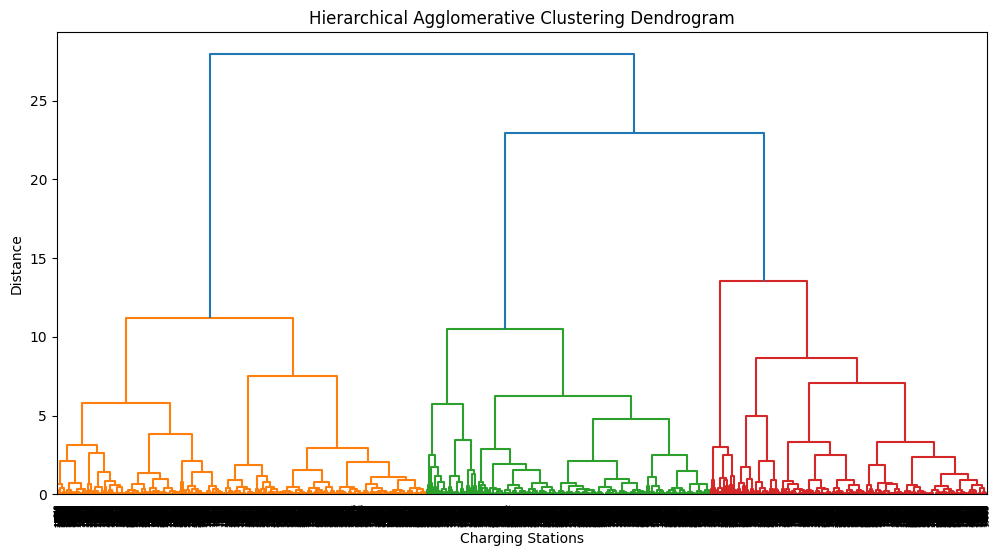

In [11]:
whole = HAC(meta)

In [38]:
from scipy.cluster.hierarchy import fcluster
from scipy.spatial.distance import cdist
def assign_to_cluster(new_coords, linkage_matrix, height_cutoff):
    # Calculate the distance of new coordinates from the existing ones
    distances = cdist(new_coords[['lat', 'lng']], linkage_matrix[:, :2], metric='euclidean')

    # Find the index of the closest cluster center for each new coordinate
    closest_clusters = np.argmin(distances, axis=1) + 1  # +1 because cluster indices start from 1

    # Assign the new coordinates to the corresponding clusters based on the cutoff
    assigned_clusters = fcluster(linkage_matrix, height_cutoff, criterion='distance')

    # Map the closest clusters to the assigned clusters
    mapped_clusters = assigned_clusters[closest_clusters]

    return mapped_clusters

# Example usage
new_coordinates = pd.DataFrame({'lat': [37.565192], 'lng': [126.822981]})
assigned_clusters = assign_to_cluster(new_coordinates, whole, 0.15)

# Display the assigned clusters for the new coordinates
print(assigned_clusters)


[200]


In [48]:
meta.loc[meta['Cluster']==162]

,statnm,statid,chgerid,chgertype,addr,lat,lng,busiid,output,zscode,usetime,speed,Count,Cluster
0,암사1동 공영주차장,0,01,6,서울특별시 강동구 고덕로28길 36,37.552909,127.137255,45,50,11740,24시간 이용가능,1,1,162
1,천호유수지 공영주차장,1,01,6,서울특별시 강동구 선사로 70,37.544812,127.121840,45,50,11740,24시간 이용가능,1,1,162
2,천호3동 제1공영주차장,2,01,6,서울특별시 강동구 진황도로29길 34,37.538795,127.133399,45,50,11740,24시간 이용가능,1,1,162
527,길동복합청사,527,01,4,서울특별시 강동구 천호대로 1183,37.534562,127.142686,45,100,11740,24시간 이용가능,1,1,162
900,천호 두산위브센티움,880,01,2,서울특별시 강동구 올림픽로70길 61,37.539402,127.126989,4,7,11740,24시간 이용가능,0,1,162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13819,천호역공영주차장,13282,01,4,서울특별시 강동구 천호동 455,37.538494,127.125109,9,100,11740,24시간 이용가능,1,1,162
14129,강동그린타워 (주)케이티아이에스,13579,01,2,서울특별시 강동구 천호대로 1139,37.534596,127.138117,56,7,11740,24시간 이용가능,0,1,162
14394,강동 현대홈타운,13825,01,2,서울특별시 강동구 고덕로27길 36,37.556566,127.138856,30,7,11740,24시간 이용가능,0,1,162
14395,강동 현대홈타운,13825,15,4,서울특별시 강동구 고덕로27길 36,37.556566,127.138856,30,50,11740,24시간 이용가능,1,1,162


In [39]:
distances = cdist(new_coordinates[['lat', 'lng']], whole[:, :2], metric='euclidean')

In [41]:
closest_clusters = np.argmin(distances, axis=1) + 1

In [45]:
distances[0][2340]

6633.499602511462

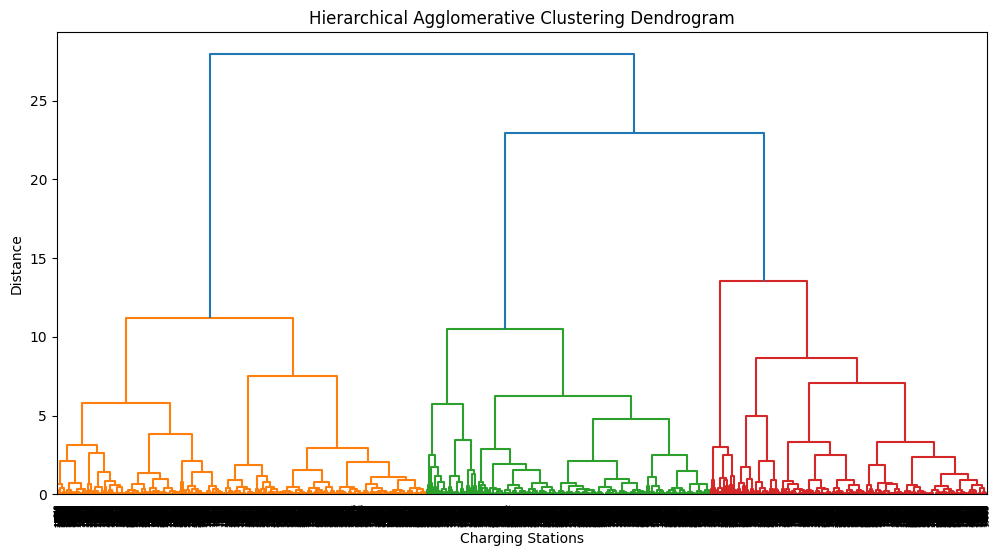

In [6]:
meta = clustering(meta)

In [7]:
def preprocessing2(meta, c_meta):
    #인코딩, 라벨링 및 결측치 처리
    meta['chgertype'] = meta['chgertype'].astype('int')
    c_meta['chgertype'] = c_meta['chgertype'].astype('int')
    busiid = meta['busiid'].values
    busiid = np.unique(busiid)
    dict_busiid = {x : k for k, x in enumerate(busiid)}
    meta['busiid'] = meta['busiid'].apply(lambda x: dict_busiid[x])
    null_unique = c_meta.loc[c_meta['zscode'].isnull()]['statnm'].unique()

    na = meta.loc[meta['zscode'].isna()]
    for i in range(len(na)):
        meta.loc[na.index[i], 'zscode'] = meta.loc[meta['Cluster'] == na['Cluster'].values[i]]['zscode'].value_counts().keys()[0]

    for i in range(len(null_unique)):
        c_meta.loc[c_meta['statnm'] == null_unique[i], 'zscode'] = meta.loc[meta['statnm'] == null_unique[i]]['zscode'].values[0]

    c_meta['zcode'] = c_meta['zscode'].apply(lambda x: x[:2])
    return meta, c_meta

In [8]:
meta, c_meta = preprocessing2(meta, c_meta) 

In [9]:
def driver_profile():
    random.seed(34)
    #비율 정보
    charger_type = {'DC_demo':[1, 3, 5, 6], 'DC_combo':[4,5,6],'AC_1':[2],'AC_3':[3,6,7]}
    charger_type_prob = {'DC_demo':1512/53774, 'DC_combo':7903/53774,'AC_1':45831/53774,'AC_3':975/53774}
    speed_prob = {0:46354/53774, 1:7420/46354}
    drivers = {'seoul':63807 /185336, 'incheon':30905/185336, 'gyeonggi':90624/185336}
    ind_charger_type = {'DC_demo': 1, 'AC_1': 2, ('DC_demo','AC_3'): 3, 'DC_combo': 4, ('DC_demo','DC_combo'): 5, ('DC_demo','DC_combo','AC_3'): 6, 'AC_3': 7}

    #인구별 비율 정보
    seoul_population = {'11000':9409466, '11110':140032, '11140':121482, '11170':216547, '11200':278750, '11215':336446,
    '11230':340333, '11260':383072, '11290':428122, '11305':290583, '11320':307968, '11350':499908, '11380':465977, '11410':307672,
    '11440':364573, '11470':437665, '11500':565195, '11530':394363, '11545':228858, '11560':375526, '11590':380478, '11620':485994,
    '11650':404616, '11680':540730, '11710':656176, '11740':458400}
    incheon_population = {'28000':2985152, '28110':157127, '28140':59922, '28177':405633,'28185':389310,'28200':497181,
    '28237':488696, '28245':283422, '28260':614123, '28710':69265, '28720':20473}
    gyeonggi_population = {'41000':13925862,'41270':700138,'41110':1216965,'41130':945037,'41460':1093665,'41190':829846,
    '41170':553249,'41590':922092,'41220':588046,'41390':543553,'41210':296471,'41570':504267,'41410':274100,'41610':398225,
    '41500':229854,'41370':238579,'41550':200408,'41430':164363,'41450':322271,'41670':115317,'41830':122539,'41290':73528,
    '41280':1090339,'41360':740856,'41150':468339,'41480':493503,'41630':243071,'41310':193351,'41650':160209,'41250':96860,
    '41820':63268,'41800':43553}

    seoul_prob = {}
    for i in seoul_population.keys():
        if i == '11000':
            continue
        else:
            seoul_prob[i] = seoul_population[i] / seoul_population['11000']

    incheon_prob = {}
    for i in incheon_population.keys():
        if i == '28000':
            continue
        else:
            incheon_prob[i] = incheon_population[i] / incheon_population['28000']

    gyeonggi_prob = {}
    for i in gyeonggi_population.keys():
        if i == '41000':
            continue
        else:
            gyeonggi_prob[i] = gyeonggi_population[i] / gyeonggi_population['41000']

    #기본 운전자 프로필 생성 
    num_drivers = 185336
    driver_data = []

    for i in range(num_drivers):
        temp_location = random.choices(list(drivers.keys()), drivers.values())[0]
        if temp_location == 'seoul':
            temp_location = random.choices(list(seoul_prob.keys()), seoul_prob.values())[0]
        elif temp_location == 'incheon':
            temp_location = random.choices(list(incheon_prob.keys()), incheon_prob.values())[0]
        elif temp_location == 'gyeonggi':
            temp_location = random.choices(list(gyeonggi_prob.keys()), gyeonggi_prob.values())[0]
        driver = {
            'Driver': i,
            'Location': temp_location,
        }
        driver_data.append(driver)

    driver_df = pd.DataFrame(driver_data)
    driver_df = driver_df.sort_values(['Location']).reset_index(drop=True)
    driver_df['zcode'] = driver_df['Location'].apply(lambda x: x[:2])
    return driver_df


In [10]:
driver_profile = driver_profile()

In [11]:
def random_driver_location(driver_df, c_meta, ratio=0.9, random_state=34): 
    #각 운전자의 거주지에 해당하는 충전소 할당
    result = pd.DataFrame([])

    #고유 거주지 위치마다
    for i in driver_df['Location'].unique():
        np.random.seed(random_state)
        #고유 거주지 위치의 운전자 수
        temp_driver = driver_df.loc[driver_df['Location'] == i].reset_index(drop=True)
        num_samples = len(temp_driver)
        indices = np.arange(num_samples)
        np.random.shuffle(indices)
        temp_driver_slow = driver_df.iloc[indices[:int(num_samples*ratio)]].reset_index(drop=True)
        temp_driver_fast = driver_df.iloc[indices[int(num_samples*ratio):]].reset_index(drop=True)

        #고유 거주지 위치의 고유 충전기 수 (완)
        temp_charger_slow = c_meta.loc[(c_meta['zscode'] == i) & (c_meta['speed'] == 0)].reset_index(drop=True)
        #고유 거주지 위치의 고유 충전기 수 (급)
        temp_charger_fast = c_meta.loc[(c_meta['zscode'] == i) & (c_meta['speed'] == 1)].reset_index(drop=True)
        #고유 거주지 위치의 운전자 수만큼 고유 충전기를 랜덤으로 선택 (중복 허용, 완)
        index_slow = np.random.choice(len(temp_charger_slow), len(temp_driver_slow), replace=True)
        #고유 거주지 위치의 운전자 수만큼 고유 충전기를 랜덤으로 선택 (중복 허용, 급)
        index_fast = np.random.choice(len(temp_charger_fast), len(temp_driver_fast), replace=True)
        #고유 충전기의 정보
        temp_result_slow = temp_charger_slow.iloc[index_slow].reset_index(drop=True)
        temp_result_fast = temp_charger_fast.iloc[index_fast].reset_index(drop=True)
        #고유 충전기의 정보와 운전자의 정보를 합침
        temp_result = pd.concat([temp_result_slow, temp_result_fast], axis=0).reset_index(drop=True)
        temp_result = pd.concat([temp_result, temp_driver], axis=1)
        #합친 결과를 최종 result에 할당 (거주지의 운전자 수만큼 반복)
        result = pd.concat([result, temp_result], axis=0)

    result = result.reset_index(drop=True)
    result = result[['Driver','statid','speed']]

    #운전자 - 거주지
    house_meta = result.merge(meta, on = ['statid','speed'])
    return house_meta

In [12]:
location_meta = random_driver_location(driver_profile, c_meta, 0.9, random_state=34)

In [13]:
#서울 - 인천 - 경기
seoul_to = {'seoul':0.692, 'incheon':0.035, 'gyeonggi':0.273}
incheon_to = {'seoul':0.2, 'incheon':0.725, 'gyeonggi':0.075}
gyeonggi_to = {'seoul':0.188, 'incheon':0.04, 'gyeonggi':0.772}

#서울 완속,급속 충전기
charger_in_seoul_slow = c_meta.loc[(c_meta['zcode'] == '11') & (c_meta['speed'] == 0)].reset_index(drop=True)
charger_in_seoul_fast = c_meta.loc[(c_meta['zcode'] == '11') & (c_meta['speed'] == 1)].reset_index(drop=True)

#인천 완속,급속 충전기
charger_in_incheon_slow = c_meta.loc[(c_meta['zcode'] == '28') & (c_meta['speed'] == 0)].reset_index(drop=True)
charger_in_incheon_fast = c_meta.loc[(c_meta['zcode'] == '28') & (c_meta['speed'] == 1)].reset_index(drop=True)

#경기 완속,급속 충전기
charger_in_gyeonggi_slow = c_meta.loc[(c_meta['zcode'] == '41') & (c_meta['speed'] == 0)].reset_index(drop=True)
charger_in_gyeonggi_fast = c_meta.loc[(c_meta['zcode'] == '41') & (c_meta['speed'] == 1)].reset_index(drop=True)

In [14]:
def slow_fast(driver_from_a_to_b, slow, fast, meta, ratio, random_state = 34):
    np.random.seed(random_state)
    indices_ = driver_from_a_to_b['Driver'].values
    num_samples_ = len(driver_from_a_to_b)
    np.random.shuffle(indices_)
    driver_slow = driver_from_a_to_b.loc[driver_from_a_to_b['Driver'].isin(indices_[:int(num_samples_*ratio)])].reset_index(drop=True)
    driver_fast = driver_from_a_to_b.loc[driver_from_a_to_b['Driver'].isin(indices_[int(num_samples_*ratio):])].reset_index(drop=True)

    #운전자 수만큼 고유 충전기를 랜덤으로 선택 (중복 허용, 완)
    index_slow = np.random.choice(len(slow), len(driver_slow), replace=True)
    #운전자 수만큼 고유 충전기를 랜덤으로 선택 (중복 허용, 급)
    index_fast = np.random.choice(len(fast), len(driver_fast), replace=True)
    temp_result_slow = slow.iloc[index_slow].reset_index(drop=True)
    temp_result_fast = fast.iloc[index_fast].reset_index(drop=True)
    temp_result = pd.concat([temp_result_slow, temp_result_fast], axis=0).reset_index(drop=True)
    tslow = temp_result.loc[temp_result['speed'] == 0].reset_index(drop=True)
    tfast = temp_result.loc[temp_result['speed'] == 1].reset_index(drop=True)

    result1 = pd.concat([tslow, driver_slow], axis=1)
    result2 = pd.concat([tfast, driver_fast], axis=1)
    result = pd.concat([result1, result2], axis=0).reset_index(drop=True)

    result = result[['Driver','statid','speed']]

    #운전자 - 거주지
    com_meta = result.merge(meta, on = ['statid','speed'])
    return com_meta

def random_driver_work(driver_df, meta, from_to, location, seoul_slow, seoul_fast, incheon_slow, incheon_fast, gyeonggi_slow, gyeonggi_fast, random_state = 34):
    np.random.seed(random_state)
    driver_from = driver_df.loc[driver_df['zcode'] == location].reset_index(drop=True)
    num_samples = len(driver_from)
    indices = np.arange(num_samples)
    np.random.shuffle(indices)

    destination1 = driver_from.iloc[indices[:int(num_samples*from_to['seoul'])]].reset_index(drop=True)
    destination2 = driver_from.iloc[indices[int(num_samples*from_to['seoul']):int(num_samples*(from_to['seoul']+from_to['incheon']))]]
    destination3 = driver_from.iloc[indices[int(num_samples*(from_to['seoul']+from_to['incheon'])):]]

    a_to_a = slow_fast(destination1, seoul_slow, seoul_fast, meta, 0.6, 34)
    a_to_b = slow_fast(destination2, incheon_slow, incheon_fast, meta, 0.6, 34)
    a_to_c = slow_fast(destination3, gyeonggi_slow, gyeonggi_fast, meta, 0.6, 34)
    
    return a_to_a, a_to_b, a_to_c


In [15]:
sts, sti, stg = random_driver_work(driver_profile, meta, seoul_to, '11', charger_in_seoul_slow, charger_in_seoul_fast, charger_in_incheon_slow, charger_in_incheon_fast, charger_in_gyeonggi_slow, charger_in_gyeonggi_fast, 34)
its, iti, itg = random_driver_work(driver_profile, meta, incheon_to, '28', charger_in_seoul_slow, charger_in_seoul_fast, charger_in_incheon_slow, charger_in_incheon_fast, charger_in_gyeonggi_slow, charger_in_gyeonggi_fast, 34)
gts, gti, gtg = random_driver_work(driver_profile, meta, gyeonggi_to, '41', charger_in_seoul_slow, charger_in_seoul_fast, charger_in_incheon_slow, charger_in_incheon_fast, charger_in_gyeonggi_slow, charger_in_gyeonggi_fast, 34)

work_meta = pd.concat([sts, sti, stg, its, iti, itg, gts, gti, gtg], axis=0).reset_index(drop=True)


In [16]:
#랜덤 비율 조정 5 : 4 : 1
#랜덤1 : 랜덤1, 2 : 랜덤1, 2, 3
def random_ratio(meta, random_state=34):
    random.seed(random_state)
    number_range = meta.index.tolist()
    ran1 = int(len(meta) * 0.5)
    ran2 = int(len(meta) * 0.4)

    random1 = random.sample(number_range, ran1)
    remaining_range = number_range.copy()

    for index in random1:
        remaining_range.remove(index)

    random2 = random.sample(remaining_range, ran2)
    remaining_range_copy = remaining_range.copy()
    for index in random2:
        remaining_range_copy.remove(index)

    random3 = remaining_range_copy

    return random1, random2, random3

def random_driver_generator(random_driver, c_meta, slow_ratio, random_state): 
    np.random.seed(random_state)
    #랜덤 운전자 인덱스
    random_driver_idx = random_driver.index.tolist()
    #완속 선호 운전자 인덱스
    slow_driver_idx = np.random.choice(len(random_driver), int(len(random_driver)*slow_ratio), replace=False)

    #완속 선호 운전자 인덱스 제거
    fast_driver_idx = random_driver_idx.copy()
    for index in slow_driver_idx:
        fast_driver_idx.remove(index)

    #완속 선호 운전자
    slow_driver = random_driver.iloc[slow_driver_idx].reset_index(drop=True)

    #급속 선호 운전자
    fast_driver = random_driver.iloc[fast_driver_idx].reset_index(drop=True)

    #완속 충전기
    slow_c_meta = c_meta.loc[c_meta['speed'] == 0].reset_index(drop=True)
    #완속 선호 운전자 만큼 완속 충전기 인덱스 추출 (중복 허용)
    slow_charger_index = np.random.choice(len(slow_c_meta), len(slow_driver), replace=True)

    #급속 충전기
    fast_c_meta = c_meta.loc[c_meta['speed'] == 1].reset_index(drop=True)
    #급속 선호 운전자 만큼 급속 충전기 인덱스 추출 (중복 허용)
    fast_charger_index = np.random.choice(len(fast_c_meta), len(fast_driver), replace=True)

    #완속 충전기
    slow_charger = slow_c_meta.iloc[slow_charger_index].reset_index(drop=True)
    slow_random_driver = pd.concat([slow_charger, slow_driver], axis=1)

    #급속 충전기
    fast_charger = fast_c_meta.iloc[fast_charger_index].reset_index(drop=True)
    fast_random_driver = pd.concat([fast_charger, fast_driver], axis=1)

    slow_random_driver = slow_random_driver[['Driver','statid','speed']]
    fast_random_driver = fast_random_driver[['Driver','statid','speed']]

    r1_driver = pd.concat([slow_random_driver, fast_random_driver], axis=0).reset_index(drop=True)
    random_meta = r1_driver.merge(meta, on = ['statid','speed'])
    return random_meta


In [17]:
random1, random2, random3 = random_ratio(work_meta, 34)
#랜덤1 운전자
random1_driver = driver_profile.iloc[random1].reset_index(drop=True)
#랜덤1,2 운전자
random12_driver = driver_profile.iloc[random2].reset_index(drop=True)
#랜덤1,2,3 운전자
random123_driver = driver_profile.iloc[random3].reset_index(drop=True)

#다른 랜덤 할당을 위한 다른 random_state 할당
#운전자 - 랜덤1
random1_meta = random_driver_generator(random1_driver, c_meta, 0.2, 34)

#운전자 - 랜덤2 (1,2)
random2_meta = random_driver_generator(random12_driver, c_meta, 0.2, 34)
random22_meta = random_driver_generator(random12_driver, c_meta, 0.2, 42)
random2_meta = pd.concat([random2_meta, random22_meta], axis=0).reset_index(drop=True)

#운전자 - 랜덤3 (1,2,3)
random3_meta = random_driver_generator(random123_driver, c_meta, 0.2, 34)
random33_meta = random_driver_generator(random123_driver, c_meta, 0.2, 42)
random333_meta = random_driver_generator(random123_driver, c_meta, 0.1, 333)
random3_meta = pd.concat([random3_meta, random33_meta, random33_meta], axis=0).reset_index(drop=True)

In [18]:
drivers = pd.concat([location_meta, work_meta, random1_meta, random2_meta, random3_meta], axis=0)
drivers = drivers.sort_values(['Driver']).reset_index(drop=True)

In [19]:
metastatid = meta['statid'].unique()
driverid = drivers['Driver'].unique()

metastatiddict = {x : k for k, x in enumerate(metastatid)}
drivers['statid'] = drivers['statid'].apply(lambda x: str(metastatiddict[x]))
meta['statid'] = meta['statid'].apply(lambda x: str(metastatiddict[x]))

In [20]:
with open('./data/trainset_df.pickle', 'wb') as f:
    pickle.dump(drivers, f)
with open('./data/meta.pickle', 'wb') as f:
    pickle.dump(meta, f)
with open('./data/c_meta.pickle', 'wb') as f:
    pickle.dump(c_meta, f)

----------------------------

In [ ]:
#주말, 평일 시간대별 평균 충전 전력량 (완속, 급속)
avgkWhdayfast = [320, 300, 280, 290, 310, 380, 430, 560, 680, 780, 830, 980, 960, 950, 970, 990, 930, 900, 830, 780, 630, 500, 420, 350]
avgkWhweekendfast = [130, 120, 110, 120, 130, 150, 180, 200, 225, 270, 300, 320, 340, 350, 370, 360, 330, 300, 280, 250, 210, 190, 160, 140]
avgkWhdayslow = [125, 120, 110, 103, 97, 87, 70, 56, 50, 45, 42, 41, 40, 41, 43, 45, 53, 72, 98, 110, 118, 128, 134, 128]
avgkWhweekendslow = [45, 43, 41, 38, 35, 31, 29, 26, 22, 19, 18, 18, 19, 19, 20, 21, 23, 28, 30, 33, 37, 39, 40, 46]

plt.subplots(figsize=(20, 5))
plt.plot(avgkWhdayfast, label='fast_day')
plt.plot(avgkWhweekendfast, label='fast_weekend')
plt.legend()

In [ ]:
plt.subplots(figsize=(20, 5))
plt.plot(avgkWhdayslow, label='slow_day')
plt.plot(avgkWhweekendslow, label='slow_weekend')
plt.legend()

In [ ]:
prob_w_fast = [x / sum(avgkWhweekendfast) for x in avgkWhweekendfast]
prob_fast = [x / sum(avgkWhdayfast) for x in avgkWhdayfast]
prob_w_slow = [x / sum(avgkWhweekendslow) for x in avgkWhweekendslow]
prob_slow = [x / sum(avgkWhdayslow) for x in avgkWhdayslow]

-------

In [2]:
import pickle
import numpy as np
import pandas as pd
import random
import pickle5

In [39]:
with open('./data/drivers.pickle', 'rb') as f:
    drivers = pickle.load(f)

with open('./data/meta.pickle', 'rb') as f:
    meta = pickle.load(f)

with open('./data/c_meta.pickle', 'rb') as f:
    c_meta = pickle.load(f)

# with open('./data/after_processing.pickle', 'rb') as f:
#     after_processing = pickle.load(f)

In [53]:
meta['output'] = meta['output'].astype('int')

In [54]:
meta['output'].value_counts().keys().sort_values()

Int64Index([  1,   3,   7,  10,  11,  14,  15,  17,  22,  25,  30,  35,  40,
             50,  60,  90, 100, 110, 120, 150, 175, 180, 200, 240, 260, 280,
            300, 320, 350, 400],
           dtype='int64')

In [57]:
meta['output'].value_counts().sort_index()

1           5
3       31643
7      161990
10         21
11       5991
14       1149
15          1
17         21
22          7
25        278
30        898
35          1
40          5
50       5558
60         16
90          6
100     13912
110         1
120       842
150        37
175        10
180        17
200      4433
240        55
260       246
280         2
300       315
320        95
350       162
400         1
Name: output, dtype: int64

<BarContainer object of 30 artists>

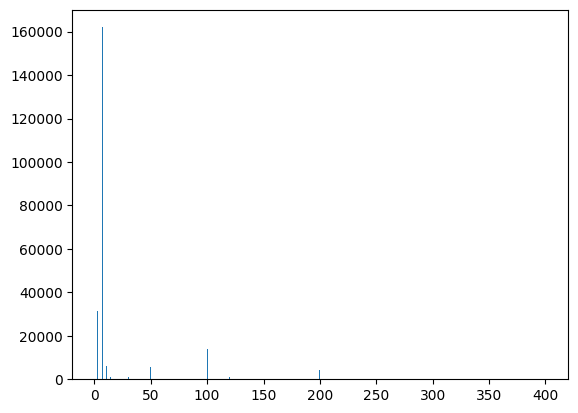

In [58]:
meta['output'].value_counts().keys().sort_values()
plt.bar(meta['output'].value_counts().keys().sort_values(), meta['output'].value_counts().sort_index().values)

In [62]:
meta['speed'].value_counts()

0    202010
1     25708
Name: speed, dtype: int64

In [65]:
meta['output'].value_counts().sort_index()

1           5
3       31643
7      161990
10         21
11       5991
14       1149
15          1
17         21
22          7
25        278
30        898
35          1
40          5
50       5558
60         16
90          6
100     13912
110         1
120       842
150        37
175        10
180        17
200      4433
240        55
260       246
280         2
300       315
320        95
350       162
400         1
Name: output, dtype: int64

In [35]:
def data_loader(drivers, meta, location = 0.9,random_state = 34):

    contents = []
    for i in driverid:
        unique_driver = drivers.loc[drivers['Driver'] == i]
        uniq = str(i)
        for j in range(len(unique_driver)):
            uniq += str(' ' + unique_driver['statid'].values[j])
        contents.append(uniq)

    with open('./train.txt', 'wb') as f:
        for i in contents:
            f.write(i.encode('utf-8'))
            f.write(b'\n')

    np.random.seed(random_state)
    random.seed(random_state)
    random.shuffle(driverid)
    location_prior = driverid[:int(len(driverid)*location)]
    busiid_prior = driverid[int(len(driverid)*location):]
    preferences = {'location':location_prior, 'busiid':busiid_prior}

    with open('./data/preference.pickle', 'rb') as f:
        pp = pickle5.load(f)

    for i in range(len(pp)):
        statid = pp['statid']
        try:
            statid[i] = metastatiddict[statid[i]]
        except:
            statid[i] = None

    pp = pp.loc[~pp['statid'].isnull()].reset_index(drop=True)
    preference_dict = {}
    ppid = pp['statid']
    ppun = pp['using_number']
    for i in range(len(pp)):
        preference_dict[ppid[i]] = ppun[i]
            
    total = np.sum(list(preference_dict.values()))
    for i in preference_dict.keys():
        preference_dict[i] = preference_dict[i] / total
    sampled_keys = random.choices(list(preference_dict.keys()), weights=list(preference_dict.values()), k=len(driverid))
    
    testsetdf = pd.DataFrame(sampled_keys, columns=['statid'])
    testsetdf['Driver'] = testsetdf.index
    testsetdf['statid'] = testsetdf['statid'].astype(str)
    tmp = testsetdf.merge(meta, on='statid')

    with open('./data/testset_df.pickle', 'wb') as f:
        pickle.dump(tmp, f)

    contents = []
    for i in range(len(sampled_keys)):
        contents.append(str(i) + ' ' + str(sampled_keys[i]))
    # test_charging = np.random.choice(len(drivers), len(driverid), replace=True)
    # test1 = drivers.iloc[sampled_keys].reset_index(drop=True)
    # test1['Driver'] = np.arange(len(test1))
    # test_driver_id = test1['Driver'].unique()

    # contents = []
    # for i in test_driver_id:
    #     unique_driver = test1.loc[test1['Driver'] == i]
    #     uniq = str(i)
    #     for j in range(len(unique_driver)):
    #         uniq += str(' ' + unique_driver['statid'].values[j])
    #     contents.append(uniq)

    with open('./test.txt', 'wb') as f:
        for i in contents:
            f.write(i.encode('utf-8'))
            f.write(b'\n')

    with open('./new_preferences.pickle', 'wb') as f:
        pickle.dump(preferences, f)


In [36]:
data_loader(drivers, meta, 0.9, 34)

/home/jhmoon/venvEV/env/lib/python3.7/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/jhmoon/venvEV/env/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
